# WISE COMPUTING HEAVENS: Graviational Lensing and Review
Instructor: Ian Johnson

Date: Feb 2 2025

Welcome back to coding! Let's get reaquainted with python!

First, let's define some variables!

In [ ]:
G = 4.3e-6   # Gravitational constant in kpc (km/s)^2 / solar mass
c = 3e5      # Speed of light in km/s

mass = 1e12  # Mass of the lensing object in solar masses
distance_lens = 5000  # Distance to the lens in kpc
distance_source = 10000  # Distance to the source in kpc

Now, let's cover some physics!

(Wikipedia is a good source although it can be terse: https://en.wikipedia.org/wiki/Gravitational_lensing_formalism)

Our angle of deflection will be:

$$\alpha = \frac{4GM}{c^2 b}$$

What does our impact parameter $b$ mean?

In [ ]:
def deflection_angle(mass, impact_parameter):
    """Calculate the bending angle of light in radians."""
    alpha = 4 * G * mass / (c**2 * impact_parameter)
    return alpha

While we can do this many ways, let's make a list of impact parameters $b$

In [ ]:
impact_parameters_list = []

impact_parameters_spacing = 0.5 #kpc

num_rays = 5

for n in range(1, num_rays + 1, 1):
    new_pos_param = n * impact_parameters_spacing
    new_neg_param = -n * impact_parameters_spacing
    impact_parameters_list.append(new_pos_param)
    impact_parameters_list.append(new_neg_param)

Python is all about its packages, so let's load some in in different ways

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

How are these different? Discuss

In [ ]:
light_paths = []

light_path_x = np.linspace(0, distance_source, 100)


for b in impact_parameters_list:
    angle_alpha = deflection_angle(mass, b)
    light_path_y = []
    for x in light_path_x:
        if x >= distance_lens:
            light_path_y.append(b)

        else:
            distance_to_lens = x - distance_lens
            path_deviate_y = distance_to_lens * np.tan(angle_alpha)
            light_path_y.append(path_deviate_y + b)

    light_paths.append((light_path_x, light_path_y))
    

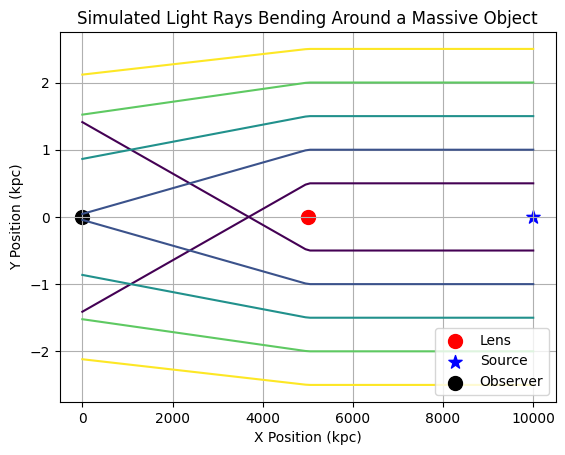

In [ ]:
colors = plt.cm.viridis(np.linspace(0, 1, num_rays))  # Assign colors to every pair

i = 0
for lp in light_paths:
    color = colors[i // 2]
    plt.plot(lp[0], lp[1], color=color)
    i += 1

plt.scatter(distance_lens, 0, color='r', marker='o', s=100, label='Lens')
plt.scatter(distance_source, 0, color='b', marker='*', s=100, label='Source')
plt.scatter(0, 0, color='black', marker='o', s=100, label='Observer')

plt.xlabel("X Position (kpc)")
plt.ylabel("Y Position (kpc)")
plt.title("Simulated Light Rays Bending Around a Massive Object")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()